<a href="https://colab.research.google.com/github/mahesh-from-sirsi/All_My_AI_Work/blob/main/Module3_5_Multimodal_Models_using_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal Models using API


1. [Setup and Helper Functions](#setup)
2. [Vision Features - Image Analysis and Generation](#vision)
3. [Audio Features - Speech and Sound Processing](#audio)




In [1]:
%pip install -qU openai==1.57.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.2/390.2 kB 10.4 MB/s eta 0:00:00


In [2]:
# Helper function to display images: display_image_from_url
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

def display_image_from_url(url: str, max_width: int = 600, max_height: int = 400):
    """
    Display an image from a URL with a maximum size constraint.

    Args:
    url (str): The URL of the image to display.
    max_width (int): The maximum width of the displayed image. Default is 800.
    max_height (int): The maximum height of the displayed image. Default is 600.
    """
    from PIL import Image
    import requests
    from io import BytesIO
    from IPython.display import display

    # Fetch the image
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # Calculate the aspect ratio
    aspect_ratio = img.width / img.height

    # Determine new size while maintaining aspect ratio
    if img.width > max_width or img.height > max_height:
        if aspect_ratio > 1:
            new_width = min(img.width, max_width)
            new_height = int(new_width / aspect_ratio)
        else:
            new_height = min(img.height, max_height)
            new_width = int(new_height * aspect_ratio)

        img = img.resize((new_width, new_height))

    # Display the resized image
    display(img)


In [3]:
import os

os.environ["OPENAI_API_KEY"] = ""

## Vision Capabilities

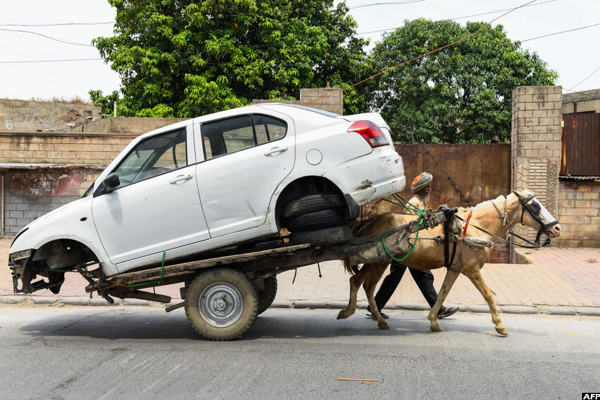

In [4]:
## Image 1

display_image_from_url("https://newvision-media.s3.amazonaws.com/cms/4040184f-4412-4775-980f-d2df40139bd3.jpg")

In [6]:
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What is happening in this image?"},
        # {"type": "text", "text": "What is this image all about?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://newvision-media.s3.amazonaws.com/cms/4040184f-4412-4775-980f-d2df40139bd3.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=1000,
)

# print(response.choices[0])
print(response.choices[0].message.content)

The image shows a horse pulling a cart, which is carrying a white car. This unusual mode of transport seems to involve moving the car using a basic horse-drawn cart setup.


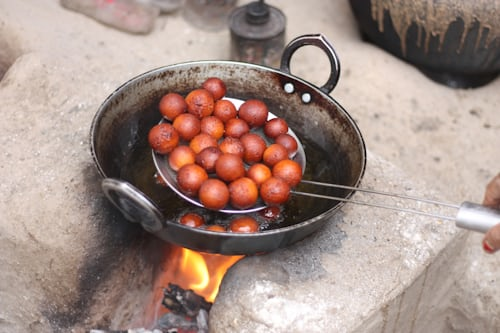

In [7]:
## Image 2

display_image_from_url("https://images.unsplash.com/photo-1593701461250-d7b22dfd3a77?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8N3x8Z3VsYWIlMjBqYW11bnxlbnwwfHwwfHx8MA%3D%3D")

In [8]:
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "How can I cook this?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://images.unsplash.com/photo-1593701461250-d7b22dfd3a77?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8N3x8Z3VsYWIlMjBqYW11bnxlbnwwfHwwfHx8MA%3D%3D",
          },
        },
      ],
    }
  ],
  max_tokens=1000,
)

# print(response.choices[0])
print(response.choices[0].message.content)

The food in the image appears to be gulab jamun, a popular Indian dessert. Here's how you can make it:

### Ingredients:

- **For the dough:**
  - 1 cup milk powder
  - 1/4 cup all-purpose flour
  - 1/4 tsp baking soda
  - 2 tbsp ghee (clarified butter)
  - 1/4 cup milk (maybe a little more if needed)

- **For the sugar syrup:**
  - 2 cups sugar
  - 1 1/2 cups water
  - 4-5 cardamom pods, slightly crushed
  - A few saffron strands (optional)
  - 1 tsp rose water or a few drops of rose essence (optional)

- **For frying:**
  - Ghee or oil

### Instructions:

1. **Prepare the Sugar Syrup:**
   - Mix sugar, water, and cardamom in a pot.
   - Bring it to a boil, then simmer until the sugar dissolves.
   - Add saffron and rose water if using.
   - Keep the syrup warm.

2. **Make the Dough:**
   - In a mixing bowl, combine milk powder, all-purpose flour, and baking soda.
   - Add ghee and mix until the mixture resembles breadcrumbs.
   - Slowly add milk, a little at a time, mixing until it f

## Audio Capabilties

GPT-4o Audio Preview Supported Modalities

1. Text Input:
   - Text in → Text + Audio out

2. Audio Input:
   - Audio in → Text + Audio out
   - Audio in → Text out

3. Combined Input:
   - Text + Audio in → Text + Audio out
   - Text + Audio in → Text out

In [9]:
# Create Audio

import base64
from openai import OpenAI

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o-audio-preview",
    modalities=["text", "audio"],
    audio={"voice": "alloy", "format": "wav"},
    messages=[
        {
            "role": "user",
            "content": "Is a golden retriever a good family dog?"
        }
    ]
)

print(completion.choices[0])

wav_bytes = base64.b64decode(completion.choices[0].message.audio.data)
with open("dog.wav", "wb") as f:
    f.write(wav_bytes)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content=None, refusal=None, role='assistant', audio=ChatCompletionAudio(id='audio_68d75edf9d848191a89a678dac8e1158', data='UklGRv////9XQVZFZm10IBAAAAABAAEAwF0AAIC7AAACABAAZGF0Yf////8fABsAEgAcAAwAHAAPABUAFQAWABwADgAWABEAFgAQABQAEAARABYAEwATABEAEwAQABgAEAAUAAsAFQARABUAFAASABQAEQAbABQAHQAVACIAFQAdAB8AIQAkABsAKwAdACoAHAAoACEALAAvACwANwArADcAJAA6ACgAPQAuADQANAAoADsAIAA2AB8AOQAnADUAMQAiAC8AGAAtABUAKgAVABUAFwAEABkA+v8RAPn/AQD7//P//v/f//j/1f/s/9f/2v/g/8n/3f+5/9L/s//N/7//u/++/6X/vP+k/7L/oP+p/6n/ov+n/53/o/+X/5v/n/+X/5//kv+V/5n/k/+Z/4v/mf+O/5r/kv+Y/5b/kP+W/47/l/+Q/53/j/+X/47/mP+Q/5L/m/+L/6X/jv+d/5P/lP+e/5b/p/+V/6L/mP+d/5//nv+m/53/ov+m/6P/rP+d/6z/qf+u/7P/qv+7/63/wv+2/7n/wv+7/9D/v//b/8v/3//e/+P/8P/l/wEA6v8BAP//DQAJABAAGwAZACkAJAA6ADUASQBGAE4ATABRAFoAWABwAGcAcQBqAHQAcQB7AIAAhACGAIcAlACJAJcAigCXAJAAlwCWAJ0AnACcAJsAlACTAIgAmwCGAJ0AiQCXAHwAdwBxAGAAeABiAHsAUwBbAEIARwA1ADMALAAaACIABQARAOr/8P/T/9X/yP+8/8H/pP+w/4T/j/9u/3T/XP

In [10]:
from IPython.display import Audio
Audio(wav_bytes)

In [12]:
## Analyze Audio

import requests
url = "https://openaiassets.blob.core.windows.net/$web/API/docs/audio/alloy.wav"
response = requests.get(url)
response.raise_for_status()
wav_data = response.content
encoded_string = base64.b64encode(wav_data).decode('utf-8')

completion = client.chat.completions.create(
    model="gpt-4o-audio-preview",
    modalities=["text", "audio"],
    audio={"voice": "alloy", "format": "wav"},
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What is in this recording?"
                },
                {
                    "type": "input_audio",
                    "input_audio": {
                        "data": encoded_string,
                        "format": "wav"
                    }
                }
            ]
        },
    ]
)

print(completion.choices[0].message)


ChatCompletionMessage(content=None, refusal=None, role='assistant', audio=ChatCompletionAudio(id='audio_68d7608d4fec8191a221b7f3c1688c06', data='UklGRv////9XQVZFZm10IBAAAAABAAEAwF0AAIC7AAACABAAZGF0Yf////8XABMAFQAJAAcADwAJAAoABgAHAAMABAD//wMADAAMAAoAAgAEAAQAAQAEAAAAAAADAAcABgAAAP7/BAADAAUACgAIAAMAAgD///v//f8BAPr/9v/1//b//P/7//r/9v/1//T/9f/6//j/+f/z/+//8v/0//D/7f/n/+b/5v/h/+L/3v/c/9j/2P/d/9n/1//a/9b/2//a/93/2//Y/9X/1P/Y/9X/0//P/83/zv/R/8//z//L/8n/zP/O/8//xf/E/73/vf/C/7z/uP+2/7P/t/+9/8D/uv+4/7f/t/+//8P/yP/I/8X/zP/T/9z/2P/X/9v/4f/p/+n/6P/n/+r/7//5/wIAAQAGAAkADwAUAB0AGgAeAB4AIQAoAC4ALgArACoALAAvACwAKQAjAB4AHwAcABsAFwAWAA4ACAALAAgAAgACAPv/AQACAAcA/P/5//T/9P/9//7/AgD+//j//P/+/wkACgANABMAHAAgACYAMwA2ADEAOgBCAEIASAA/AD0APgA5ADUAKQAlACAAGgAYAA0ABAD2/+H/0v/H/7b/pf+M/3j/Z/9Y/0z/QP8x/yv/I/8i/yP/Jv8q/yz/PP9C/1b/Z/99/4z/mP+r/8H/z//P/8b/wP+m/5b/iP99/3z/gf+Q/6P/uf+8/7f/ov+N/4n/oP+y/8T/2P/z/x8AQwBgAHwArQDvAA4BMwFSAWwBgQGJAdYB/QHsAQUCBgLpAcEBrAGkAY8BcwFlAQsBywDnAJ4AWABdAIoAmwCDAKwA9QB8ALj/Lv8e/wX/3f7n/tP

In [14]:
wav_bytes = base64.b64decode(completion.choices[0].message.audio.data)

from IPython.display import Audio
Audio(wav_bytes)